# Intro to Data Visualization with Python-Part2

###  Importing libraries

In [91]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [92]:
path=r'C:\Users\61491\12-2020 Instacart Basket Analysis'

In [93]:
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','df_merged_final.pkl'))

In [94]:

df.head()

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,surname,gender,state,age,date_joined,no_of_dependants,marital_status,income
0,94891,4,4,5,13,15.0,22199,1,0,Extra-Dry Cava,...,Regular customer,Bobby,Reed,Male,Arkansas,31,9/21/2017,3,married,45435
1,94891,4,4,5,13,15.0,25146,2,0,Original Orange Juice,...,Regular customer,Bobby,Reed,Male,Arkansas,31,9/21/2017,3,married,45435
2,31925,47329,4,3,10,12.0,22199,1,0,Extra-Dry Cava,...,Regular customer,Carl,Bridges,Male,Alabama,49,6/25/2017,0,single,159539
3,31925,47329,4,3,10,12.0,24968,2,1,Sonoma Brut Sparkling Wine,...,Regular customer,Carl,Bridges,Male,Alabama,49,6/25/2017,0,single,159539
4,95113,410,2,1,18,7.0,25146,18,0,Original Orange Juice,...,Frequent customer,Stephanie,Saunders,Female,Alaska,69,3/17/2020,3,married,73977


In [95]:
df.shape

(1047658, 34)

### Creating Bar Charts

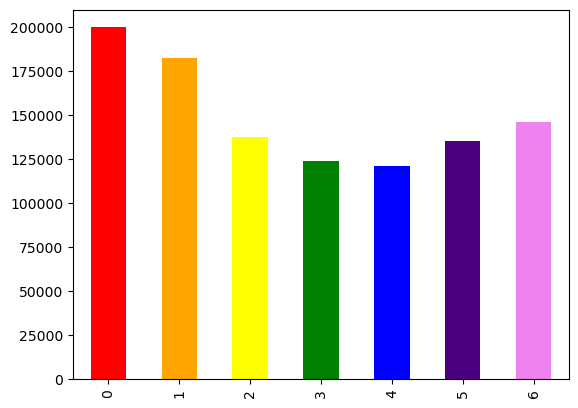

In [96]:
# create bar chart for “orders_day_of_week” 
bar=df['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red','orange','yellow','green','blue','indigo','violet'])

The busiest days are 0 = Saturday and 1 = Sunday; The slowest days are 3 = Tuesday and 4 = Wednesday

In [97]:
# Export
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### Creating Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

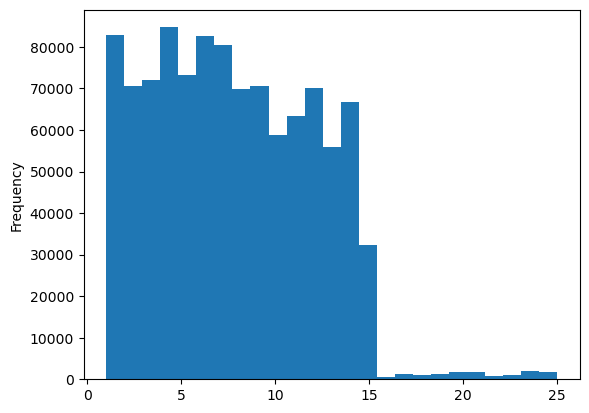

In [98]:
# creating a histogram of the “prices” column
df['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

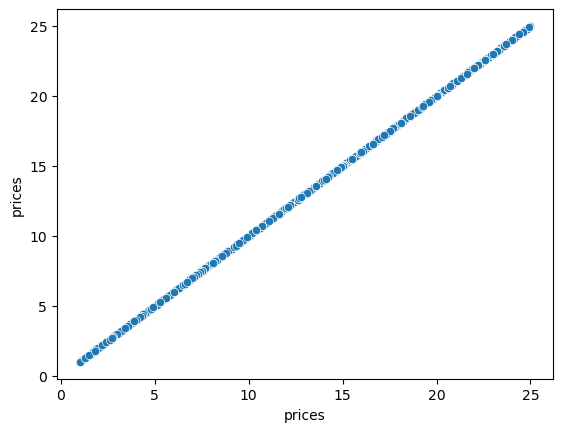

In [99]:
# creating a scatterplot  of the “prices” column
sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [100]:
df.loc[df['prices']>100]

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,surname,gender,state,age,date_joined,no_of_dependants,marital_status,income


In [101]:
# Check for values above $100
df.loc[df['prices'] > 100]

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,surname,gender,state,age,date_joined,no_of_dependants,marital_status,income


In [102]:
# Mark prices above $100 as missing
df.loc[df['prices'] >100, 'prices'] = np.nan

In [103]:
df['prices'].max()

25.0

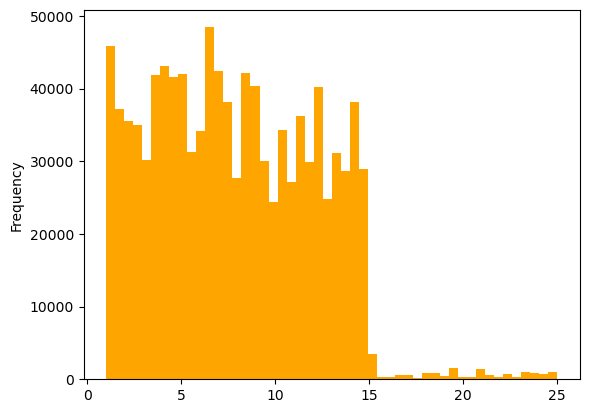

In [104]:
# Recreating a histogram of the “prices” column
histogram=df['prices'].plot.hist(bins = 50, color = 'orange')

In [105]:
# Export
histogram.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','hist_prices.png'))

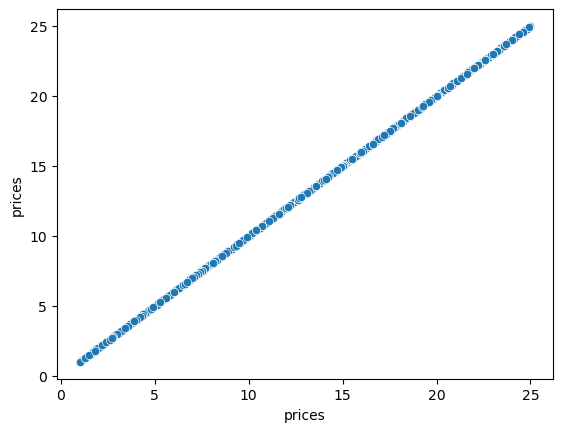

In [106]:
# Re-creating a scatterplot  of the “prices” column
scatter=sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [107]:
# Export
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_prices.png'))

### Sampling Data

In [108]:
# Create a list holding true/false values to test np.random.rand() <=0.7
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [109]:
# Store 70% of the sample in data frame big
big = df[dev]

In [110]:
# Store 30% of the sample in data frame small
small = df[~dev]

In [111]:
# Checking length is correct
len(df)

1047658

In [112]:
len(big)+len(small)

1047658

In [113]:
# Creating new data frame with “prices” and “orders_day_of_week.”  for the line chart
df_small = small[['orders_day_of_week','prices']]

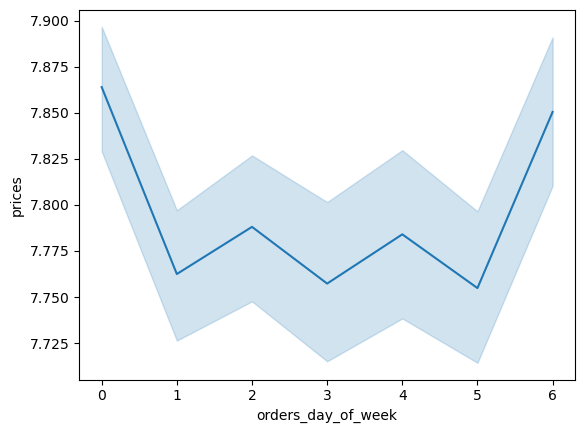

In [114]:
# Create line chart
line = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices')

In [115]:
# Export
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow.png'))

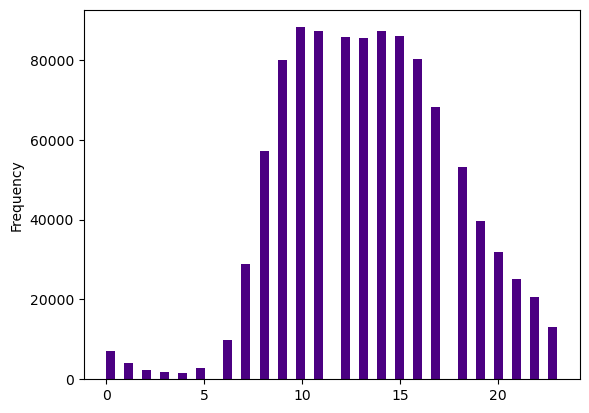

In [116]:
# Create a histogram of the “order_hour_of_day” column

histogram1 = df['order_hour_of_day'].plot.hist(bins = 50, color = 'indigo')

The histogram shows that most orders are placed between 10am and 3pm in the afternoon. It also shows that the fewest order are placed between midnight and 5am in the morning. 

In [117]:
# Export
histogram1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hour.png'))

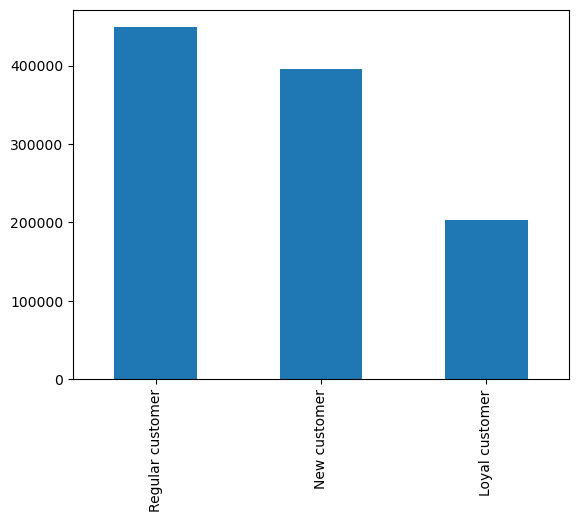

In [118]:
# Create a bar chart from the “loyalty_flag” column.
bar1 = df['loyalty_flag'].value_counts().plot.bar()

The conditions for brand loyalty were: If orders more than 40 , then loyal customer, If orders between 10 and 40, then regular customer, If orders less than 10, then new customerr


A large number of customers are Regular while Loyal customers are few

In [119]:
# Export
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

In [120]:
# Creating new data frame with just the columns needed for the line chart
df_small1 = small[['order_hour_of_day','prices']]

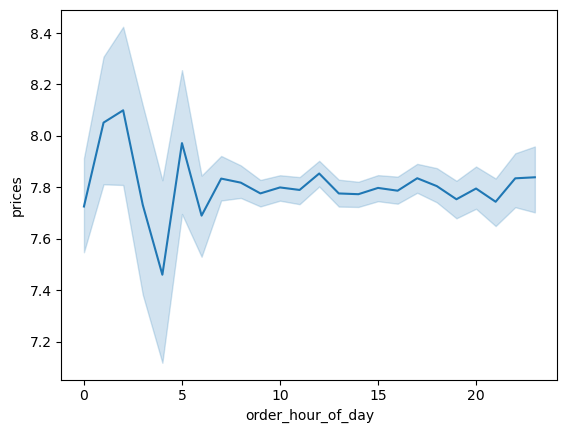

In [121]:
# Create line chart
line1 = sns.lineplot(data = df_small1, x = 'order_hour_of_day', y = 'prices')

Prices seem to go up from midnight up to just before 5am. However this is just a spike as they go up again at 5am and stablise after 8am until 11pm. This also relates to orders as few are placed during the period between midnight and 5am when prices are not stable.

In [122]:
# Export
line1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hour.png'))

In [123]:
# Establish a connection between age and family situation
# Creating new data frame with age and number of dependents
df_small2 = small[['age','no_of_dependants']]

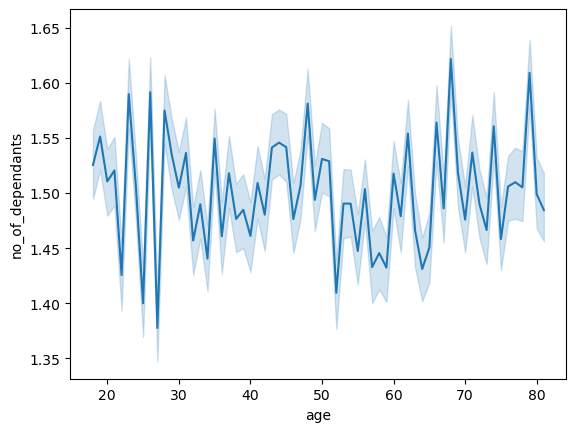

In [124]:
# Create line chart
line2 = sns.lineplot(data = df_small2, x = 'age',y = 'no_of_dependants')

The line shows that the number of dependents is not dependent on age.

In [125]:
# Export
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_fam.png'))

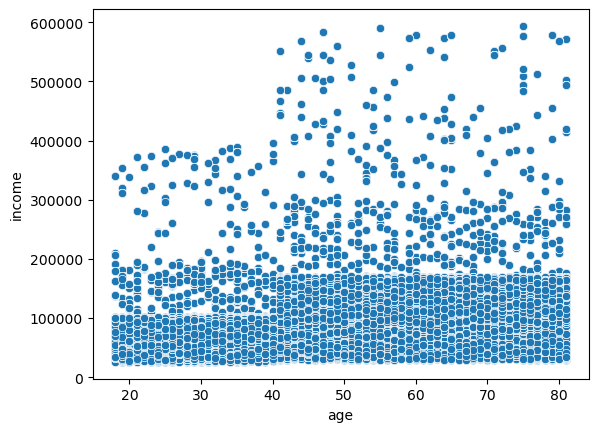

In [126]:
# Establish a connection between age and spending power (income)
scatter1 = sns.scatterplot(x = 'age', y = 'income', data = df)

The majority of customers aged up to 40 have an income of up to 100000. For customers over 40 years the majority earn up to 200000. The maximum income for less than 40 years is 400000 and for over 40 years is approximately 600000.  

In [127]:
# Export
scatter1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_age_income.png'))

In [128]:
# Export to pkl
df.to_pickle(os.path.join(path, '02 Data','Prepared Data','df_merged_final.pkl'))